In [1]:
from utils.models import *

In [2]:
env()

--------- Dependencies ---------
python: 3.8.10 | packaged by conda-forge | (default, May 11 2021, 06:25:23) [MSC v.1916 64 bit (AMD64)]
numpy: 1.21.0
pandas: 1.2.4
matplotlib: 3.4.2
scipy: 1.7.1
statsmodels: 0.13.0


## VIX

In [3]:
wti = load('data/WTI.csv').pct_change().dropna()
c1 = clean_series('contract_1', wti)
vix = load('data/VIX.csv')
vix_shock = calc_shock('VIX', vix)

In [4]:
lags = 1
Q= 25
r = 1
p = 4
x0 = np.array([0] + [1 for _ in range(lags+1)])
kalman = KF(x0, lags=lags, r=r, p=p, Q=Q)
kf = kalman.run('contract_1', 'VIX', c1.join(vix_shock).dropna())

<AxesSubplot:>

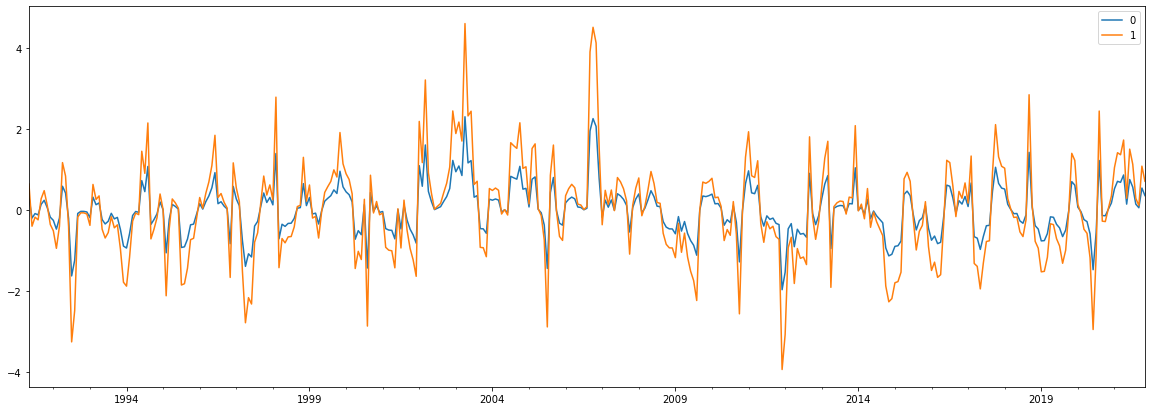

In [5]:
kf.plot(figsize=(20,7))

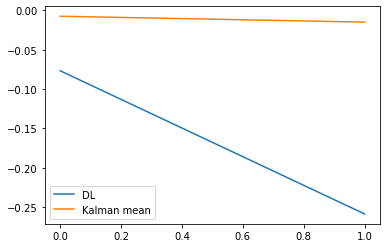

In [6]:
dl = DL('contract_1', 'VIX', c1.join(vix_shock).dropna().iloc[lags:], lags=lags)
plt.plot(np.cumsum(dl.model.params[1:]), label='DL')
plt.plot(kf.mean(), label='Kalman mean')
plt.legend()

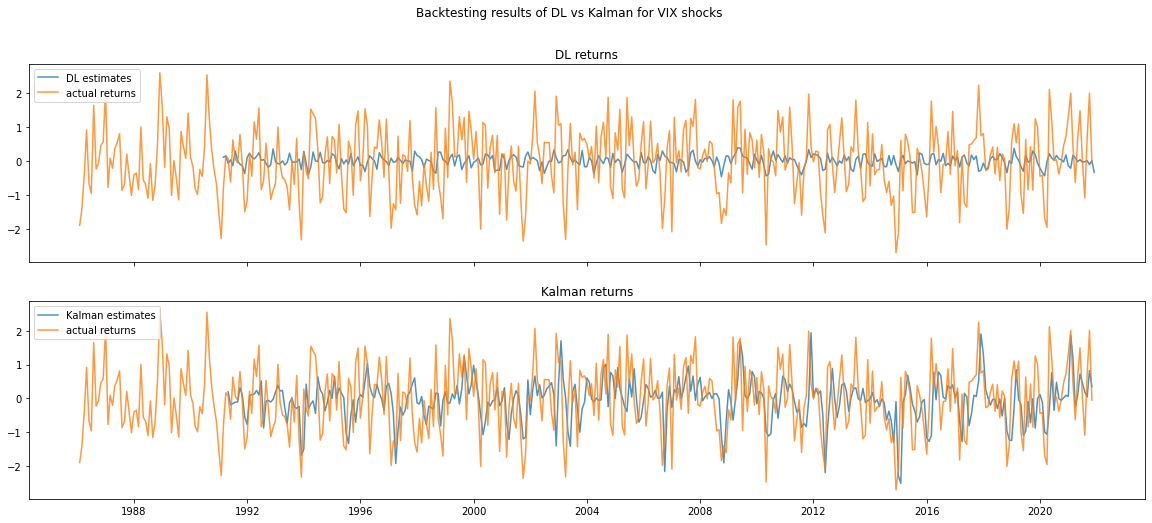

In [7]:
kalman_backtest = kalman.backtest()

x = vix_shock['VIX']
dl_backtest = dl.model.params[0] + x * dl.model.params[1]
for i in range(2, lags+2): # remember params contain constant at [0]
    dl_backtest += x.shift(i-1) * dl.model.params[i]

fig, ax = plt.subplots(2, sharex=True, figsize=(20,8))
fig.suptitle('Backtesting results of DL vs Kalman for VIX shocks')
ax[0].plot(dl_backtest, label='DL estimates', alpha=0.8)
ax[0].plot(c1.contract_1, label='actual returns', alpha=0.8)
ax[0].set_title('DL returns')
ax[0].legend()
ax[1].plot(kalman_backtest, label='Kalman estimates', alpha=0.8)
ax[1].plot(c1.contract_1, label='actual returns', alpha=0.8)
ax[1].set_title('Kalman returns')
ax[1].legend()

In [8]:
rmse_dl = np.sqrt(np.sum((c1.contract_1.loc[min(dl_backtest.index):] - dl_backtest)** 2) / len(dl_backtest))
rmse_kalman = np.sqrt(np.sum((c1.contract_1.loc[min(kalman_backtest.index):] - kalman_backtest)** 2) / len(kalman_backtest))
print(f'RMSE DL: {rmse_dl}')
print(f'RMSE Kalman: {rmse_kalman}')

RMSE DL: 0.9775880112333397
RMSE Kalman: 0.9971058978153216


## GPR

In [9]:
gpr = load('data/GPRGlobal.csv')
gpr_shock = calc_shock('GPRI', gpr)

In [10]:
kalman = KF(x0, lags=lags, r=r, p=p, Q=Q)
kf2 = kalman.run('contract_1', 'GPRI', c1.join(gpr_shock).dropna())

<AxesSubplot:>

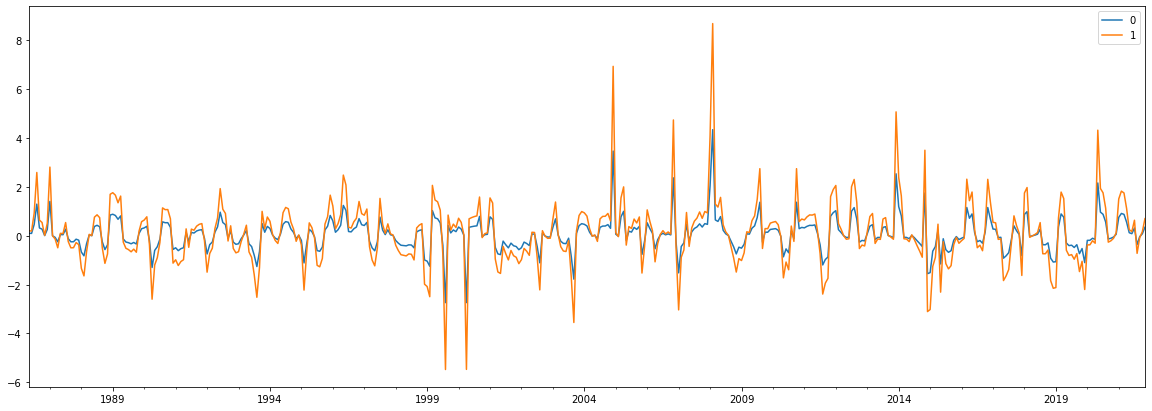

In [11]:
kf2.plot(figsize=(20, 7))

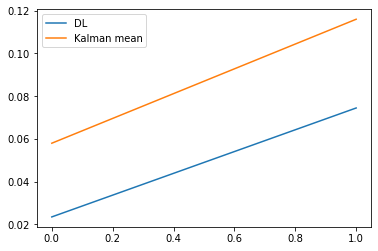

In [12]:
dl2 = DL('contract_1', 'GPRI', c1.join(gpr_shock).dropna().iloc[lags:], lags=lags)
plt.plot(np.cumsum(dl2.model.params[1:]), label='DL')
plt.plot(kf2.mean(), label='Kalman mean')
plt.legend()

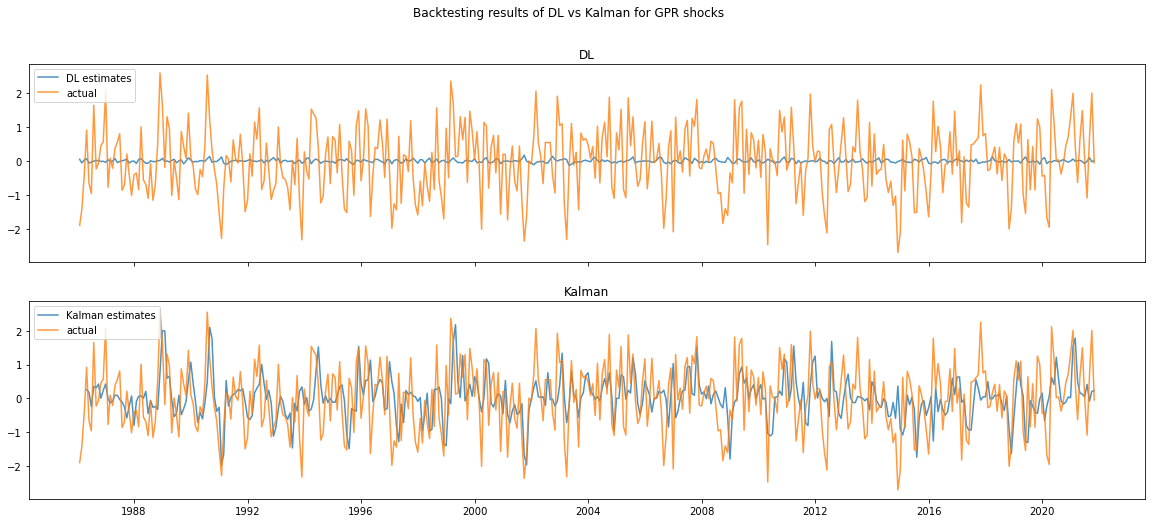

In [13]:
kalman_backtest2 = kalman.backtest()

x = gpr_shock.GPRI
dl_backtest2 = dl2.model.params[0] + x * dl2.model.params[1]
for i in range(2, lags+2): # remember params contain constant at [0]
    dl_backtest2 += x.shift(i-1) * dl2.model.params[i]

fig, ax = plt.subplots(2, sharex=True, figsize=(20,8))
fig.suptitle('Backtesting results of DL vs Kalman for GPR shocks')
ax[0].plot(dl_backtest2, label='DL estimates', alpha=0.8)
ax[0].plot(c1.contract_1, label='actual', alpha=0.8)
ax[0].set_title('DL')
ax[0].legend()
ax[1].plot(kalman_backtest2, label='Kalman estimates', alpha=0.8)
ax[1].plot(c1.contract_1, label='actual', alpha=0.8)
ax[1].set_title('Kalman')
ax[1].legend()

In [14]:
rmse_dl2 = np.sqrt(np.sum((c1.contract_1.loc[min(dl_backtest2.index):] - dl_backtest2) ** 2) / len(dl_backtest2))
rmse_kalman2 = np.sqrt(np.sum((c1.contract_1.loc[min(kalman_backtest2.index):] - kalman_backtest2) ** 2) / len(kalman_backtest2))
print(f'RMSE DL: {rmse_dl2}')
print(f'RMSE Kalman: {rmse_kalman2}')

RMSE DL: 0.9937140492817417
RMSE Kalman: 0.9731765016716198


## EPU

In [15]:
epu = load('data/EPUGlobal.csv')
epu_shock = calc_shock('GEPU_current', epu)

In [16]:
kalman = KF(x0, lags=lags, r=r, p=p, Q=Q)
kf3 = kalman.run('contract_1', 'GEPU_current', c1.join(epu_shock).dropna())

<AxesSubplot:>

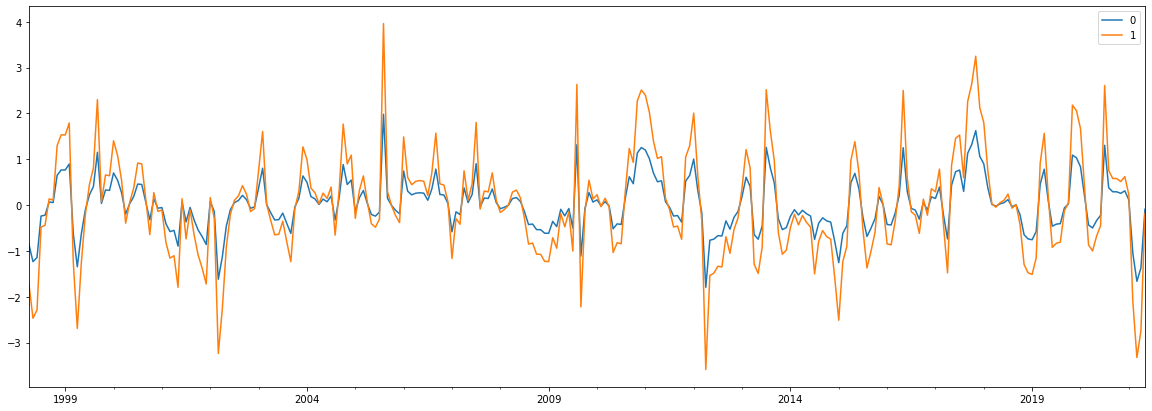

In [17]:
kf3.plot(figsize=(20, 7))

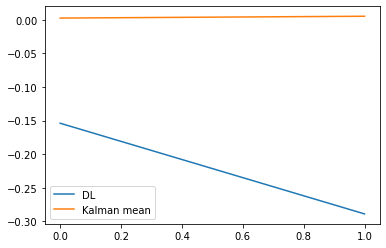

In [18]:
dl3 = DL('contract_1', 'GEPU_current', c1.join(epu_shock).dropna().iloc[lags:], lags=lags)
plt.plot(np.cumsum(dl3.model.params[1:]), label='DL')
plt.plot(kf3.mean(), label='Kalman mean')
plt.legend()

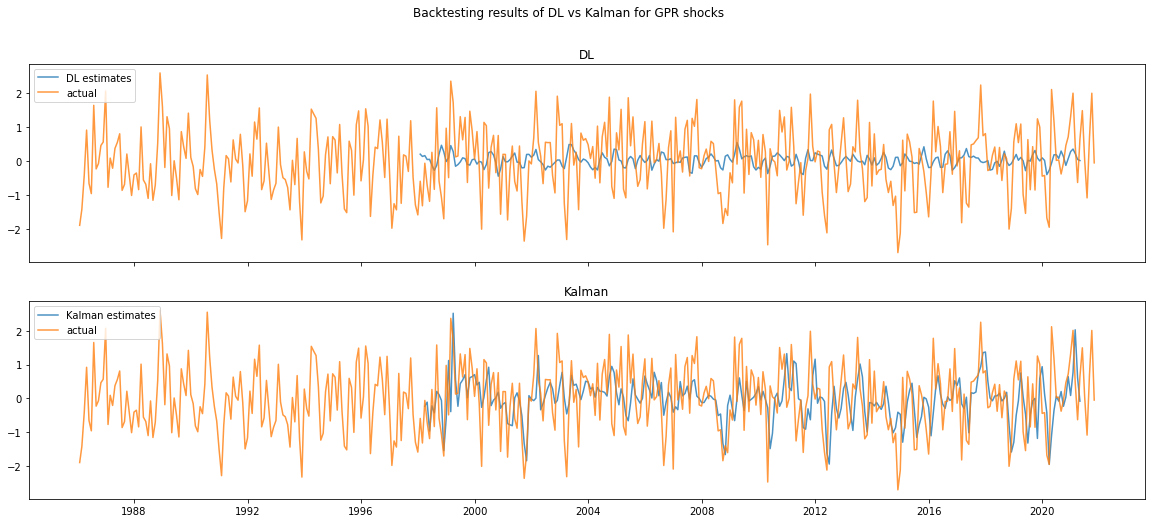

In [19]:
kalman_backtest3 = kalman.backtest()

x = epu_shock.GEPU_current
dl_backtest3 = dl3.model.params[0] + x * dl3.model.params[1]
for i in range(2, lags+2): # remember params contain constant at [0]
    dl_backtest3 += x.shift(i-1) * dl3.model.params[i]

fig, ax = plt.subplots(2, sharex=True, figsize=(20,8))
fig.suptitle('Backtesting results of DL vs Kalman for GPR shocks')
ax[0].plot(dl_backtest3, label='DL estimates', alpha=0.8)
ax[0].plot(c1.contract_1, label='actual', alpha=0.8)
ax[0].set_title('DL')
ax[0].legend()
ax[1].plot(kalman_backtest3, label='Kalman estimates', alpha=0.8)
ax[1].plot(c1.contract_1, label='actual', alpha=0.8)
ax[1].set_title('Kalman')
ax[1].legend()

In [20]:
rmse_dl3 = np.sqrt(np.sum((c1.contract_1.loc[min(dl_backtest3.index):] - dl_backtest3) ** 2) / len(dl_backtest3))
rmse_kalman3 = np.sqrt(np.sum((c1.contract_1.loc[min(kalman_backtest3.index):] - kalman_backtest3) ** 2) / len(kalman_backtest3))
print(f'RMSE DL: {rmse_dl3}')
print(f'RMSE Kalman: {rmse_kalman3}')

RMSE DL: 0.9890811114962466
RMSE Kalman: 0.9694740457983421
